In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df1 = pd.read_csv("ttrain.csv")
df2 = pd.read_csv("ttest.csv")

df = df1.append(df2)

# EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
abs(df.corr()["Survived"]).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

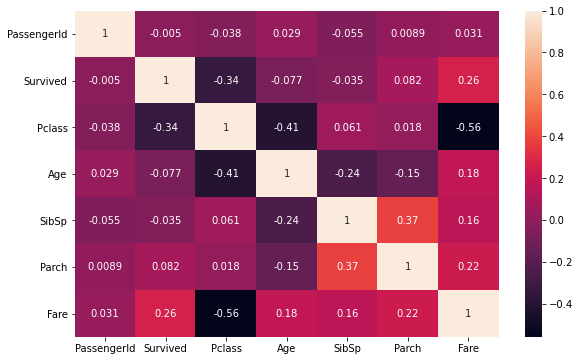

In [6]:
plt.figure(figsize=(9.5,6))
sns.heatmap(df.corr(),annot=True);

# DATA PREPAIRING AND FUTURE ENGINEERING 

In [7]:
df["Fare"].fillna(df.Fare[df["Pclass"] == 3].mean(), inplace = True)

In [8]:
df["Embarked"].fillna("S", inplace = True)

In [9]:
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.",expand = False)
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Jonkheer      1
Dona          1
Sir           1
Mme           1
Don           1
Lady          1
Capt          1
Countess      1
Name: Title, dtype: int64

In [10]:
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")

df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")

df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr")

In [11]:
df["Senior"] = df["Age"].map(lambda s:1 if s > 66 else 0)

df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace = True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [12]:
del df["Cabin"]

In [13]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

In [14]:
df['Kid'] = np.where(df['Age']<15,1,0)
df['Young'] = np.where((df.Age > 14) & (df.Age < 25),1,0)
df['Adult'] = np.where((df.Age > 24) & (df.Age < 67),1,0)

In [15]:
df.drop(["PassengerId","Ticket"], axis = 1, inplace = True)

In [16]:
df["Single"] = np.where(df.Family < 2,1,0)
df["Small"] = np.where((df.Family > 1) & (df.Family < 5),1,0)
df["Medium"] = np.where((df.Family > 4) & (df.Family < 7),1,0)
df["Large"] = np.where(df.Family > 6,1,0)

In [17]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0,2,0,1,0,0,1,0,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,0,2,0,0,1,0,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,0,1,0,0,1,1,0,0,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,0,2,0,0,1,0,1,0,0
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Mrs,0,1,0,0,1,1,0,0,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Mr,0,1,0,0,1,1,0,0,0
416,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0


In [18]:
df["Pclass"] = df["Pclass"].astype("category")

In [19]:
df.Sex = df["Sex"].replace(["female"], 1)
df.Sex = df["Sex"].replace(["male"], 3.1442326208357407) #3.1442326208357407

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   float64 
 4   Age       1309 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Fare      1309 non-null   float64 
 8   Embarked  1309 non-null   object  
 9   Title     1309 non-null   object  
 10  Senior    1309 non-null   int64   
 11  Family    1309 non-null   int64   
 12  Kid       1309 non-null   int32   
 13  Young     1309 non-null   int32   
 14  Adult     1309 non-null   int32   
 15  Single    1309 non-null   int32   
 16  Small     1309 non-null   int32   
 17  Medium    1309 non-null   int32   
 18  Large     1309 non-null   int32   
dtypes: category(1), float64(4), int32(7), int64(4), o

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   float64 
 4   Age       1309 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Fare      1309 non-null   float64 
 8   Embarked  1309 non-null   object  
 9   Title     1309 non-null   object  
 10  Senior    1309 non-null   int64   
 11  Family    1309 non-null   int64   
 12  Kid       1309 non-null   int32   
 13  Young     1309 non-null   int32   
 14  Adult     1309 non-null   int32   
 15  Single    1309 non-null   int32   
 16  Small     1309 non-null   int32   
 17  Medium    1309 non-null   int32   
 18  Large     1309 non-null   int32   
dtypes: category(1), float64(4), int32(7), int64(4), o

In [22]:
df["P1f"] = np.where(df.Pclass == 1 & (df.Sex == 1),1,0)
df["P3f"] = np.where(df.Pclass == 3 & (df.Sex == 1),1,0)
df["AdultW"] = np.where((df.Age > 24) & (df.Age < 67) & (df.Sex == 1),1,0)
df["AdultM"] = np.where((df.Age > 24) & (df.Age < 67) & (df.Sex == 3.1442326208357407),1,0)

In [23]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P3f,AdultW,AdultM
0,0.0,3,"Braund, Mr. Owen Harris",3.144233,22.0,1,0,7.2500,S,Mr,0,2,0,1,0,0,1,0,0,0,0,0,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.000000,38.0,1,0,71.2833,C,Mrs,0,2,0,0,1,0,1,0,0,1,1,1,0
2,1.0,3,"Heikkinen, Miss. Laina",1.000000,26.0,0,0,7.9250,S,Miss,0,1,0,0,1,1,0,0,0,0,0,1,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.000000,35.0,1,0,53.1000,S,Mrs,0,2,0,0,1,0,1,0,0,1,1,1,0
4,0.0,3,"Allen, Mr. William Henry",3.144233,35.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",3.144233,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",1.000000,39.0,0,0,108.9000,C,Mrs,0,1,0,0,1,1,0,0,0,1,1,1,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",3.144233,38.5,0,0,7.2500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,1
416,NaN,3,"Ware, Mr. Frederick",3.144233,30.0,0,0,8.0500,S,Mr,0,1,0,0,1,1,0,0,0,0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    float64 
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   float64 
 4   Age       1309 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Fare      1309 non-null   float64 
 8   Embarked  1309 non-null   object  
 9   Title     1309 non-null   object  
 10  Senior    1309 non-null   int64   
 11  Family    1309 non-null   int64   
 12  Kid       1309 non-null   int32   
 13  Young     1309 non-null   int32   
 14  Adult     1309 non-null   int32   
 15  Single    1309 non-null   int32   
 16  Small     1309 non-null   int32   
 17  Medium    1309 non-null   int32   
 18  Large     1309 non-null   int32   
 19  P1f       1309 non-null   int32   
 20  P3f      

In [25]:
df.drop("Name",axis=1,inplace=True)

In [26]:
df_dummies = pd.get_dummies(df, drop_first = True)

df_train = df_dummies[:891]
df_test = df_dummies[891:]

x=df_train.drop("Survived",axis=1)
y=df_train["Survived"]

In [27]:
df_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P3f,AdultW,AdultM,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3.144233,22.0,1,0,7.2500,0,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
1,1.0,1.000000,38.0,1,0,71.2833,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1
2,1.0,1.000000,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
3,1.0,1.000000,35.0,1,0,53.1000,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1
4,0.0,3.144233,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [28]:
x.shape,y.shape

((891, 25), (891,))

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         891 non-null    float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Senior      891 non-null    int64  
 7   Family      891 non-null    int64  
 8   Kid         891 non-null    int32  
 9   Young       891 non-null    int32  
 10  Adult       891 non-null    int32  
 11  Single      891 non-null    int32  
 12  Small       891 non-null    int32  
 13  Medium      891 non-null    int32  
 14  Large       891 non-null    int32  
 15  P1f         891 non-null    int32  
 16  P3f         891 non-null    int32  
 17  AdultW      891 non-null    int32  
 18  AdultM      891 non-null    int32  
 19  Pclass_2    891 non-null    u

# DEEP LEARNING

In [30]:
import pandas as pd

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [32]:
model=Sequential()
model.add(Dense(19,activation="relu")) #Sütun sayısı kadar başlatacağız
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # 1 adet çıktımız olucağı için 1 dedik. Mesela 1-10 arası sayıları tahmin etmemiz gerekiyorsa 10 adet yazarız.

In [33]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
x.shape,y.shape

((891, 25), (891,))

In [35]:
x.head()

,Sex,Age,SibSp,Parch,Fare,Senior,Family,Kid,Young,Adult,Single,Small,Medium,Large,P1f,P3f,AdultW,AdultM,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3.144233,22.0,1,0,7.2500,0,2,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
1,1.000000,38.0,1,0,71.2833,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1
2,1.000000,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
3,1.000000,35.0,1,0,53.1000,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1
4,3.144233,35.0,0,0,8.0500,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [36]:
model.fit(x,y,epochs=500,batch_size=10,verbose=1) # epochs=200 accuracy:0.9024

Epoch 1/500
90/90 [==============================] - 1s 787us/step - loss: 0.6252 - accuracy: 0.6532
Epoch 2/500
90/90 [==============================] - 0s 764us/step - loss: 0.5735 - accuracy: 0.6936
Epoch 3/500
90/90 [==============================] - 0s 764us/step - loss: 0.5493 - accuracy: 0.6992
Epoch 4/500
90/90 [==============================] - 0s 764us/step - loss: 0.5262 - accuracy: 0.7340
Epoch 5/500
90/90 [==============================] - 0s 775us/step - loss: 0.5043 - accuracy: 0.7452
Epoch 6/500
90/90 [==============================] - 0s 763us/step - loss: 0.4769 - accuracy: 0.7800
Epoch 7/500
90/90 [==============================] - 0s 764us/step - loss: 0.4571 - accuracy: 0.8092
Epoch 8/500
90/90 [==============================] - 0s 764us/step - loss: 0.4623 - accuracy: 0.8070
Epoch 9/500
90/90 [==============================] - 0s 764us/step - loss: 0.4529 - accuracy: 0.8193
Epoch 10/500
90/90 [==============================] - 0s 787us/step - loss: 0.4406 - accura

90/90 [==============================] - 0s 775us/step - loss: 0.3481 - accuracy: 0.8552
Epoch 82/500
90/90 [==============================] - 0s 775us/step - loss: 0.3472 - accuracy: 0.8530
Epoch 83/500
90/90 [==============================] - 0s 742us/step - loss: 0.3485 - accuracy: 0.8507
Epoch 84/500
90/90 [==============================] - 0s 742us/step - loss: 0.3701 - accuracy: 0.8350
Epoch 85/500
90/90 [==============================] - 0s 742us/step - loss: 0.3585 - accuracy: 0.8474
Epoch 86/500
90/90 [==============================] - 0s 753us/step - loss: 0.3461 - accuracy: 0.8530
Epoch 87/500
90/90 [==============================] - 0s 731us/step - loss: 0.3476 - accuracy: 0.8530
Epoch 88/500
90/90 [==============================] - 0s 753us/step - loss: 0.3665 - accuracy: 0.8507
Epoch 89/500
90/90 [==============================] - 0s 730us/step - loss: 0.3814 - accuracy: 0.8384
Epoch 90/500
90/90 [==============================] - 0s 753us/step - loss: 0.3694 - accuracy: 

90/90 [==============================] - 0s 760us/step - loss: 0.3213 - accuracy: 0.8687
Epoch 161/500
90/90 [==============================] - 0s 832us/step - loss: 0.3227 - accuracy: 0.8541
Epoch 162/500
90/90 [==============================] - 0s 845us/step - loss: 0.3193 - accuracy: 0.8676
Epoch 163/500
90/90 [==============================] - 0s 821us/step - loss: 0.3130 - accuracy: 0.8721
Epoch 164/500
90/90 [==============================] - 0s 751us/step - loss: 0.3179 - accuracy: 0.8631
Epoch 165/500
90/90 [==============================] - 0s 832us/step - loss: 0.3066 - accuracy: 0.8653
Epoch 166/500
90/90 [==============================] - 0s 857us/step - loss: 0.3141 - accuracy: 0.8709
Epoch 167/500
90/90 [==============================] - 0s 910us/step - loss: 0.3096 - accuracy: 0.8743
Epoch 168/500
90/90 [==============================] - 0s 922us/step - loss: 0.3166 - accuracy: 0.8687
Epoch 169/500
90/90 [==============================] - 0s 933us/step - loss: 0.3235 - a

90/90 [==============================] - 0s 775us/step - loss: 0.2896 - accuracy: 0.8709
Epoch 240/500
90/90 [==============================] - 0s 735us/step - loss: 0.2854 - accuracy: 0.8765
Epoch 241/500
90/90 [==============================] - 0s 788us/step - loss: 0.3393 - accuracy: 0.8608
Epoch 242/500
90/90 [==============================] - 0s 865us/step - loss: 0.3061 - accuracy: 0.8664
Epoch 243/500
90/90 [==============================] - 0s 843us/step - loss: 0.2966 - accuracy: 0.8721
Epoch 244/500
90/90 [==============================] - 0s 865us/step - loss: 0.2795 - accuracy: 0.8788
Epoch 245/500
90/90 [==============================] - 0s 775us/step - loss: 0.2876 - accuracy: 0.8822
Epoch 246/500
90/90 [==============================] - 0s 820us/step - loss: 0.2893 - accuracy: 0.8777
Epoch 247/500
90/90 [==============================] - 0s 855us/step - loss: 0.2843 - accuracy: 0.8754
Epoch 248/500
90/90 [==============================] - 0s 843us/step - loss: 0.2841 - a

90/90 [==============================] - 0s 820us/step - loss: 0.2601 - accuracy: 0.8833
Epoch 319/500
90/90 [==============================] - 0s 832us/step - loss: 0.2573 - accuracy: 0.8956
Epoch 320/500
90/90 [==============================] - 0s 764us/step - loss: 0.2478 - accuracy: 0.8979
Epoch 321/500
90/90 [==============================] - 0s 798us/step - loss: 0.2630 - accuracy: 0.8923
Epoch 322/500
90/90 [==============================] - 0s 731us/step - loss: 0.3023 - accuracy: 0.8664
Epoch 323/500
90/90 [==============================] - 0s 787us/step - loss: 0.3595 - accuracy: 0.8418
Epoch 324/500
90/90 [==============================] - 0s 910us/step - loss: 0.2999 - accuracy: 0.8631
Epoch 325/500
90/90 [==============================] - 0s 877us/step - loss: 0.2708 - accuracy: 0.8844
Epoch 326/500
90/90 [==============================] - 0s 787us/step - loss: 0.2590 - accuracy: 0.8844
Epoch 327/500
90/90 [==============================] - 0s 610us/step - loss: 0.2616 - a

90/90 [==============================] - 0s 719us/step - loss: 0.2585 - accuracy: 0.8810
Epoch 398/500
90/90 [==============================] - 0s 719us/step - loss: 0.2423 - accuracy: 0.8956
Epoch 399/500
90/90 [==============================] - 0s 820us/step - loss: 0.2383 - accuracy: 0.8889
Epoch 400/500
90/90 [==============================] - 0s 854us/step - loss: 0.2437 - accuracy: 0.8934
Epoch 401/500
90/90 [==============================] - 0s 854us/step - loss: 0.2404 - accuracy: 0.8934
Epoch 402/500
90/90 [==============================] - 0s 843us/step - loss: 0.2603 - accuracy: 0.8945
Epoch 403/500
90/90 [==============================] - 0s 832us/step - loss: 0.2813 - accuracy: 0.8810
Epoch 404/500
90/90 [==============================] - 0s 753us/step - loss: 0.2394 - accuracy: 0.8900
Epoch 405/500
90/90 [==============================] - 0s 753us/step - loss: 0.2408 - accuracy: 0.8990
Epoch 406/500
90/90 [==============================] - 0s 742us/step - loss: 0.2441 - a

90/90 [==============================] - 0s 787us/step - loss: 0.2540 - accuracy: 0.8878
Epoch 477/500
90/90 [==============================] - 0s 775us/step - loss: 0.2527 - accuracy: 0.8788
Epoch 478/500
90/90 [==============================] - 0s 798us/step - loss: 0.2437 - accuracy: 0.8900
Epoch 479/500
90/90 [==============================] - 0s 731us/step - loss: 0.2486 - accuracy: 0.8822
Epoch 480/500
90/90 [==============================] - 0s 719us/step - loss: 0.2322 - accuracy: 0.8945
Epoch 481/500
90/90 [==============================] - 0s 832us/step - loss: 0.2342 - accuracy: 0.8979
Epoch 482/500
90/90 [==============================] - 0s 731us/step - loss: 0.2197 - accuracy: 0.9035
Epoch 483/500
90/90 [==============================] - 0s 731us/step - loss: 0.2210 - accuracy: 0.8979
Epoch 484/500
90/90 [==============================] - 0s 753us/step - loss: 0.2631 - accuracy: 0.8855
Epoch 485/500
90/90 [==============================] - 0s 719us/step - loss: 0.2417 - a

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                494       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 19)                380       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 20        
Total params: 2,034
Trainable params: 2,034
Non-trainable params: 0
______________________________________________________

In [38]:
scores=model.evaluate(x,y) 

28/28 [==============================] - 0s 778us/step - loss: 0.2127 - accuracy: 0.9113


In [39]:
print("%s:%.2r%%" % (model.metrics_names[1],scores[1]*100))

accuracy:91%
